In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Step 1: Data Collection and Exploration
# Load the data from the CSV file
data = pd.read_csv('C:\\Users\\tehma\\OneDrive\\Desktop\\project 4\\resources\\project_churn.csv')

# Perform initial data exploration
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Get information about the dataset, such as column names and data types
print(data.describe())  # Statistical summary of the dataset

# Identify the target variable and relevant features
target_variable = 'churn'  # Replace 'churn' with the actual column name representing churn status
features = ['feature1', 'feature2', 'feature3']  # Replace with the relevant feature column names

# Further data preprocessing steps can be performed here
# Cleaning, normalization, standardization, feature engineering, etc.


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [2]:
# Convert 'Churn' column to numerical values using label encoding
le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])

# Check correlation between MonthlyCharges and Churn
correlation = data['MonthlyCharges'].corr(data['Churn'])

if correlation > 0:
    print("There is a positive correlation between MonthlyCharges and Churn.")
elif correlation < 0:
    print("There is a negative correlation between MonthlyCharges and Churn.")
else:
    print("There is no correlation between MonthlyCharges and Churn.")

There is a positive correlation between MonthlyCharges and Churn.


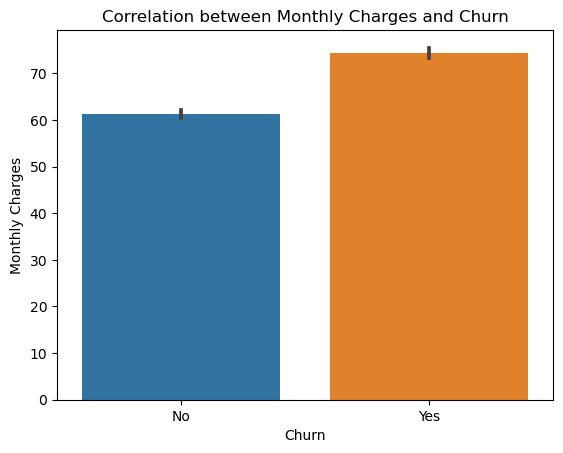

In [3]:
import seaborn as sns

# Create a new categorical series with updated labels
churn_labels = {0: 'No', 1: 'Yes'}
data['Churn'] = data['Churn'].map(churn_labels)

# Create a grouped bar plot
sns.barplot(x='Churn', y='MonthlyCharges', data=data)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Correlation between Monthly Charges and Churn')
plt.show()

In [4]:

# Split the data into training and testing sets
X = data[['MonthlyCharges']]
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the machine learning algorithm
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Prompt the user for input and make predictions
monthly_charges = float(input("Enter the monthly charges: "))
prediction = model.predict([[monthly_charges]])
print("Churn prediction:", prediction)

Accuracy: 0.7352732434350603
Enter the monthly charges: 50
Churn prediction: ['No']


C:\Users\tehma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split the data into training and testing sets
X = data[['MonthlyCharges', 'gender', 'Partner', 'Dependents', 'tenure', 'PhoneService',
          'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']]
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the columns to be one-hot encoded
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

# Apply the column transformer to preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Initialize the machine learning algorithm
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Prompt the user for input and make predictions
monthly_charges = float(input("Enter the monthly charges: "))
gender = input("Enter the gender (Male/Female): ")
partner = input("Has a partner? (Yes/No): ")
dependents = input("Has dependents? (Yes/No): ")
tenure = int(input("Enter the tenure in months: "))
phone_service = input("Has phone service? (Yes/No): ")
multiple_lines = input("Has multiple lines? (Yes/No): ")
internet_service = input("Type of internet service (DSL/Fiber optic/No): ")
online_security = input("Has online security? (Yes/No): ")
online_backup = input("Has online backup? (Yes/No): ")
device_protection = input("Has device protection? (Yes/No): ")
tech_support = input("Has tech support? (Yes/No): ")
streaming_tv = input("Has streaming TV? (Yes/No): ")
streaming_movies = input("Has streaming movies? (Yes/No): ")
contract = input("Type of contract (Month-to-month/One year/Two year): ")

# Preprocess the user input
user_input = {'MonthlyCharges': monthly_charges, 'gender': gender, 'Partner': partner,
              'Dependents': dependents, 'tenure': tenure, 'PhoneService': phone_service,
              'MultipleLines': multiple_lines, 'InternetService': internet_service,
              'OnlineSecurity': online_security, 'OnlineBackup': online_backup,
              'DeviceProtection': device_protection, 'TechSupport': tech_support,
              'StreamingTV': streaming_tv, 'StreamingMovies': streaming_movies,
              'Contract': contract}

user_data = pd.DataFrame(user_input, index=[0])
user_data = preprocessor.transform(user_data)

# Make predictions on the user input
prediction = model.predict(user_data)
print("Churn prediction:", prediction)